# Importing libraries

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import math

# Opening all the images 

In [3]:
img1 = Image.open("1.jpg")
img2 = Image.open("2.jpg")
img3 = Image.open("3.jpg")

# Visulaization of the size of the image on which we have to work

In [4]:
data1 = np.array(img1)
row, col, channel = data1.shape

In [5]:
print(data1.shape)

(626, 940, 3)


# Getting the co ordinates of the cyclone cores

[[115, 238], [179, 546], [180, 544], [180, 548], [181, 547]]


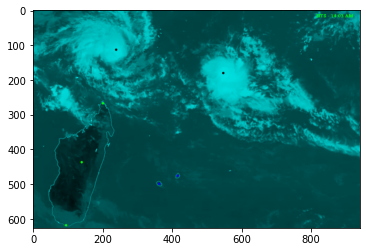

In [6]:
data1 = np.array(img1)
imR = data1.copy()
imR[:, :, (0)] = 0
plt.imshow(imR)
tt = np.array(Image.fromarray(imR))
red_dots1 = []
for i in range(row):
    for j in range(col):
        if(tt[i][j][0] == 0 and tt[i][j][1] == 0 and tt[i][j][2] == 0):
            red_dots1.append([i,j])
print(red_dots1)

# Verifying the coordinates

In [7]:
top = 110
bottom = 120
left = 234
right = 244
ttt = img1.crop((left,top,right,bottom))
display(ttt)

In [8]:
top = 175
bottom = 188
left = 543
right = 552
rr = img1.crop((left,top,right,bottom))
display(rr)

[[120, 223], [122, 223], [122, 224], [123, 224], [189, 541], [190, 539]]


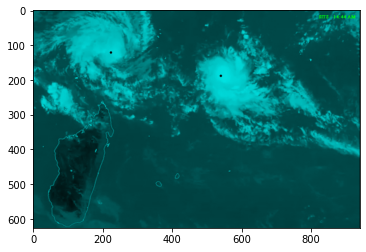

In [9]:
data2 = np.array(img2)
imR = data2.copy()
imR[:, :, (0)] = 0
plt.imshow(imR)
tt = np.array(Image.fromarray(imR))
red_dots2 = []
for i in range(row):
    for j in range(col):
        if(tt[i][j][0] == 0 and tt[i][j][1] == 0 and tt[i][j][2] == 0):
            red_dots2.append([i,j])
print(red_dots2)

[[132, 215], [132, 217], [134, 215], [134, 216], [134, 218], [194, 529], [197, 527], [197, 530]]


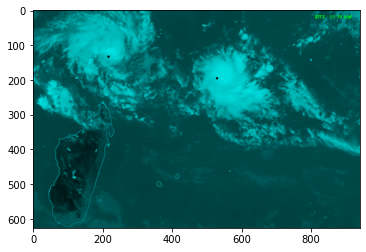

In [10]:
data3 = np.array(img3)
imR = data3.copy()
imR[:, :, (0)] = 0
plt.imshow(imR)
tt = np.array(Image.fromarray(imR))
red_dots3 = []
for i in range(row):
    for j in range(col):
        if(tt[i][j][0] == 0 and tt[i][j][1] == 0 and tt[i][j][2] == 0):
            red_dots3.append([i,j])
print(red_dots3)

# Summarising all the cyclone cores of both the cyclones

In [11]:
#Co-ordinates for the Belna
y = [115, 120, 132]
x = [238, 223, 215]

#Co-ordinates for the Ambali
yy = [180, 190, 197]
xx = [544, 541, 530]

# Linear curve fitting

In [12]:
def objective(x, a, b):
    return (a * (x) + b)

belna, _ = curve_fit(objective, [223,215], [120,132])
a, b = belna
print(a,b)

ambali, _ = curve_fit(objective, [541,530], [190,197])
aa, bb = ambali
print(aa,bb)

belnaX = np.linspace(0,255) 
belnaY = (a * (belnaX) + b ) 
ambaliX = np.linspace(0,600) 
ambaliY = (aa * (ambaliX) + bb)

-1.5000000000000013 454.5000000000003
-0.6363636363636342 534.2727272727261


/Users/sanidhyasingh/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


# Plotting all the points and curves on the image

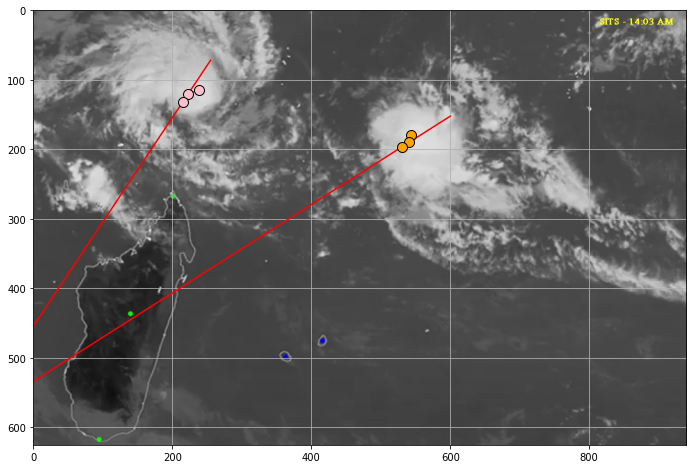

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(belnaX,belnaY,color="r")
ax.plot(ambaliX,ambaliY,color="r")
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="pink")
plt.plot(xx, yy, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="orange")
plt.imshow(img1)
plt.grid()
plt.show()

## Keys:
<ol>
    <li>RED LINE : Trajectory for the cycolnes, assuming that they become more linear as they reach the island</li>
    <li>PINK POINTS : Coordinates for belna</li>
    <li>ORANGE POINTS : Coordinates for ambali</li>
</ol>

# Finding coordinates for green and blue points

In [14]:
#finding location of all the places
data1 = np.array(img1)
bluex = []
bluey = []
llx = []
lly = []

for i in range(row):
    for j in range(col):
        if(data1[i][j][0] == 0 and data1[i][j][1] == 255 and data1[i][j][2] == 0):
            llx.append(i)
            lly.append(j)
            
# print(llx)
# print(lly)

greeny = np.array([267,437,617])
greenx = np.array([201,140,94])

llx.clear()
lly.clear()

for i in range(row):
    for j in range(col):
        if(data1[i][j][0] == 0 and data1[i][j][1] == 0 and data1[i][j][2] >= 230):
            llx.append(i)
            lly.append(j)
            
# print(llx)
# print(lly)

bluey = np.array([477,499])
bluex = np.array([416,362])

# The blue line:
### We have been given two distances. This blue line divides the image into two parts. For calculation of distance I will use ratio for the respective side

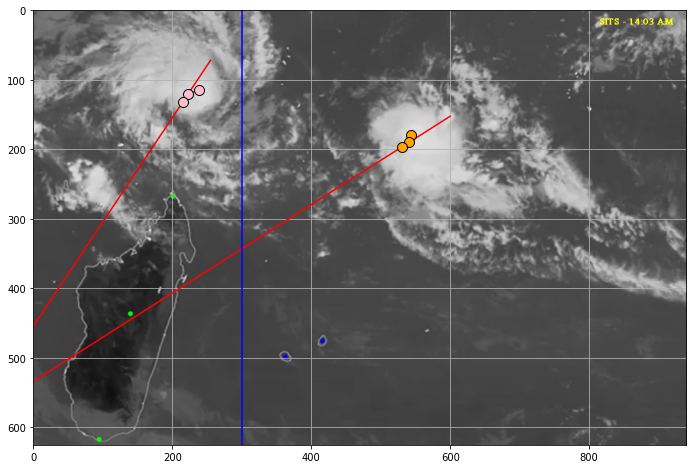

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(belnaX,belnaY,color="r")
ax.plot(ambaliX,ambaliY,color="r")
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="pink")
plt.plot(xx, yy, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="orange")
plt.axvline(x = 300, color = 'b', label = 'divider')
plt.imshow(img1)
plt.grid()
plt.show()

In [16]:
#calculation for distance
#ratio = dist(km) / pixel

def dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    

leftRatio = 1500 / dist(201,267,94,617) 
rightRatio = 250 / dist(416,477,362,499) 

print(leftRatio) #Left of the blue line
print(rightRatio) #Right of the blue line

4.098467741829403
4.287464628562721


# Answering Questions:

## Q1: Predict the apojuncture for Belna-Ambali
x = -92.362, y = 593.042, found by solving both the equation of line (coordinates are with respect to the above plot)

## Q2: How far (in Km) the apojuncture will be from the capital city?

In [17]:
#Ans2. since the apojuncture occurs in left side, so use the left side ratio

ans2 = dist(-92.362, 593.042, 140, 437)
ans2 = ans2 * leftRatio
print(ans2)
#answer is in Kilometers

1147.1405830819601


## Q3: When will it occur (how many hours after the last satellite image capture)?

In [18]:
#Distance between the points on which we have fitted the curve 
bel = dist(223,120,215,132) * leftRatio
amb = dist(541,190,530,197) * rightRatio

#The time difference between the two images were 55 minutes, using that to calculate the velocity in pixels/minute
belVel = bel / 55
ambVel = amb / 55
print(belVel, ambVel)

#Time taken to cover the distance from the last image till apojuncture
belTime = dist(215,132,-92.362,593.042) * leftRatio / (belVel * 60)
ambTime = (dist(530,197,300,343.383) * rightRatio + dist(300,343.383,-92.362,593.042) * leftRatio) / (belVel * 60)
print(belTime, ambTime)

1.074708043200074 1.0163945352271773
35.218509615402276 47.686088697347195


Belna is reaching that point about 12 hours before the Ambali (time of refrence is the last image)

## Q4: Will they actually collide in reality?

According to me they won't collide, my reasons are:
<ol>
    <li>Belna has to travel less. It just touches the island so its speed won't affect much. Thus it will reach earlier than ambali, given it survives till the apojuncture</li>
    <li>To reach the apojuncture Amabli has to cross the whole island. As given in the question "in contrast to ocean regions, man-made infrastructures over land restricts open wind flows, therefore as cyclones approach land, their inertia increases," Ambali's speed is going to decrease a lot while crossing the island. It should reach the apojuncture after Belna</li>
    <li>According to several articles over the web "A cyclone will dissipate once it moves over land or over cooler oceans," this makes very hard for both the cyclones to survive till the point of apojuncture</li>
</ol>